### ***Import Necessary Libraries***

I started by importing essential libraries for data handling, text processing, machine learning, and visualization.

In [3]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### ***Load and Explore Datasets***
Load the fake and true news datasets and check their structure.

In [4]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [5]:
print("Fake News Dataset Shape:", fake_df.shape)
print("True News Dataset Shape:", true_df.shape)

Fake News Dataset Shape: (23481, 4)
True News Dataset Shape: (21417, 4)


In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### ***Data Preprocessing***
We drop unnecessary columns and check for missing values.

In [8]:
fake_df.drop(columns=["title", "subject", "date"], inplace=True)
true_df.drop(columns=["title", "subject", "date"], inplace=True)

In [9]:
# Check for missing values
print("Missing values in Fake News Dataset:\n", fake_df.isna().sum())
print("Missing values in True News Dataset:\n", true_df.isna().sum())

Missing values in Fake News Dataset:
 text    0
dtype: int64
Missing values in True News Dataset:
 text    0
dtype: int64


### ***Assign Labels***
I labelled fake news as 1 and true news as 0.

In [10]:
fake_df["label"] = 1
true_df["label"] = 0

In [11]:
fake_df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [12]:
true_df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


### ***Sampling Data***
To balance the dataset and reduce processing time, we take the first 5000 samples from each category.

In [13]:
fake_sample = fake_df.iloc[:5000]
true_sample = true_df.iloc[:5000]

In [14]:
# Combine both datasets
df = pd.concat([fake_sample, true_sample], axis=0).reset_index(drop=True)
print("Combined Dataset Shape:", df.shape)

Combined Dataset Shape: (10000, 2)


In [15]:
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


### ***Text Preprocessing using SpaCy***

I used lemmatization to reduce words to their root forms and remove stopwords and punctuation.

In [16]:
nlp = spacy.load("en_core_web_sm")

def lemmatization(text):
    doc = nlp(text)
    return " ".join([word.lemma_ for word in doc])

In [17]:
# Apply lemmatization
df["lemma"] = df["text"].apply(lemmatization)

***Apply stopword removal***

In [18]:
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([word.text for word in doc if not word.is_stop and not word.is_punct])

# Apply stopword removal
df["processed_text"] = df["lemma"].apply(remove_stopwords)

### ***Feature Selection and Splitting Data***
We define X as the processed text and y as the labels, then split them into training and testing sets.

In [23]:
X = df["processed_text"]
y = df["label"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Build and Train Model***
I used TF-IDF (Term Frequency-Inverse Document Frequency) for text vectorization and a Random Forest Classifier for classification.

In [20]:
# Create a pipeline with TF-IDF vectorizer and Random Forest Classifier
classifier = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("random_forest", RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Train the model
classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('random_forest',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

### ***Model Evaluation***
I evaluated the model's accuracy and generate a classification report.

In [21]:
accuracy = classifier.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Make predictions
pred = classifier.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, pred))

Model Accuracy: 99.80%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### ***Confusion Matrix Visualization***
Finally, i visualized the confusion matrix to analyze model performance.

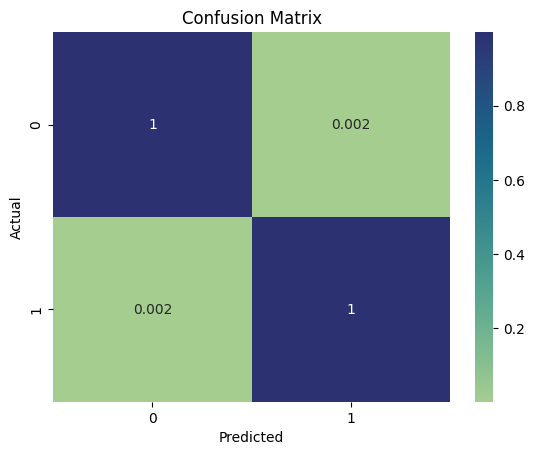

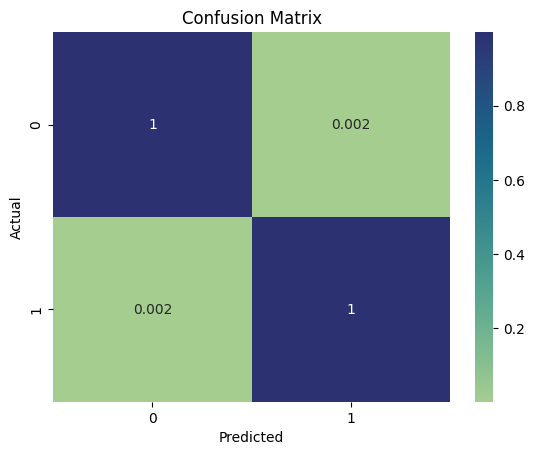

In [22]:
cf_matrix = confusion_matrix(y_test, pred, normalize="true")

# Plot heatmap
sns.heatmap(cf_matrix, annot=True, cmap="crest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()